In [83]:
%matplotlib inline
import numpy as np

data2=np.loadtxt('D:/number_recognizer/test.txt')
target2=np.loadtxt('D:/number_recognizer/target.txt')

print(data2.shape)
print(target2.shape)

(1153L, 64L)
(1153L,)


In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets, svm, metrics

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
classifier = svm.SVC(gamma=0.0011)



accu = np.mean(cross_val_score(classifier, data2, target2, cv=StratifiedKFold(target2, 5)))

#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
#classifier.fit(data[:n_samples / 3], target2[:n_samples / 3])


print (accu)

0.54817840814


In [87]:
from sklearn import metrics
expected = target2[n_samples / 2:]
predicted = rfecv.predict(data2[n_samples / 2:])



print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0011, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.28      0.32      0.30        65
          1       0.26      0.97      0.40        39
          2       0.38      0.49      0.42        70
          3       0.22      0.12      0.16        58
          4       0.48      0.25      0.33        61
          5       0.22      0.18      0.20        60
          6       0.37      0.24      0.29        63
          7       0.34      0.47      0.40        51
          8       0.65      0.18      0.28        62
          9       0.45      0.21      0.29        48

avg / total       0.37      0.32      0.30       577


Confusion matrix:
[[21 11 13  1  1  4  8  4  2  0]
 [ 0 38  0  0  0  0  0  1  0  0]
 [ 3 24 34  1  1  1  1  5  0  0]
 [ 9 15 16  7

In [85]:
for g in range(0,100):
    classifier = svm.SVC(gamma = g / 10000.)
    print(cross_val_score(classifier, X, y, cv=StratifiedKFold(y, 5)))
    print(np.mean(cross_val_score(classifier, X, y, cv=StratifiedKFold(y ,5))))

[ 0.16470588  0.14566929  0.13385827  0.19920319  0.18951613]
0.166590551538
[ 0.62352941  0.55905512  0.55905512  0.72908367  0.63709677]
0.621564017503
[ 0.65882353  0.61417323  0.58267717  0.81673307  0.65322581]
0.665126559459
[ 0.70588235  0.64566929  0.61417323  0.82071713  0.6733871 ]
0.691965820175
[ 0.7254902   0.66929134  0.6496063   0.84462151  0.70564516]
0.718930901822
[ 0.73333333  0.67716535  0.65748031  0.84860558  0.70967742]
0.725252399934
[ 0.74901961  0.68503937  0.66141732  0.84860558  0.70967742]
0.73075185956
[ 0.75686275  0.69291339  0.66141732  0.84063745  0.71370968]
0.733108116276
[ 0.76078431  0.7007874   0.67322835  0.84462151  0.70967742]
0.737819799011
[ 0.77254902  0.71653543  0.67322835  0.84462151  0.72580645]
0.746548152939
[ 0.76862745  0.71653543  0.67716535  0.84462151  0.72580645]
0.746551240788
[ 0.76862745  0.70866142  0.68110236  0.84462151  0.72177419]
0.7449573876
[ 0.76470588  0.72047244  0.68503937  0.84063745  0.71774194]
0.745719415812
[ 

KeyboardInterrupt: 

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets, svm, metrics

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
classifier = svm.SVC(gamma=0.0013)


classifier.fit(data[:n_samples / 3], target2[:n_samples / 3])




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0013, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Optimal number of features : 45


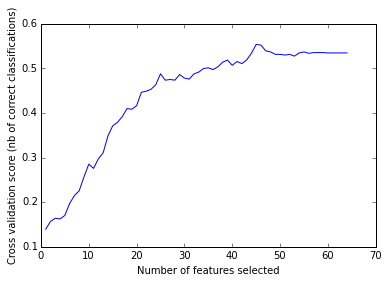

In [69]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [88]:
from sklearn import metrics
expected = target2[n_samples / 3:]
predicted = rfecv.predict(data2[n_samples / 3:])



print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 2 ..., 0 8], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   estimator_params=None, scoring='accuracy', step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.30      0.36      0.33        85
          1       0.28      0.98      0.44        57
          2       0.38      0.54      0.45        85
          3       0.33      0.17      0.22        84
          4       0.56      0.27      0.36        83
          5       0.21      0.18      0.20        71
          6       0.40      0.24      0.30        85
          7       0.35      0.47      0.40        74
          8       0.60      0.16      0.25        75
          9       0.52      0.21      0.3

In [72]:
from sklearn.externals import joblib

joblib.dump(rfecv, "./machine3.pkl") 

['./machine3.pkl',
 './machine3.pkl_01.npy',
 './machine3.pkl_02.npy',
 './machine3.pkl_03.npy',
 './machine3.pkl_04.npy',
 './machine3.pkl_05.npy',
 './machine3.pkl_06.npy',
 './machine3.pkl_07.npy',
 './machine3.pkl_08.npy',
 './machine3.pkl_09.npy',
 './machine3.pkl_10.npy',
 './machine3.pkl_11.npy',
 './machine3.pkl_12.npy',
 './machine3.pkl_13.npy',
 './machine3.pkl_14.npy',
 './machine3.pkl_15.npy',
 './machine3.pkl_16.npy']